In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import missingno as msno




In [ ]:
df = pd.read_csv('data.csv')

# Cleaning

In [ ]:
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [ ]:
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [ ]:
df.count()

Make                 11914
Model                11914
Year                 11914
Engine Fuel Type     11911
Engine HP            11845
Engine Cylinders     11884
Transmission Type    11914
Driven_Wheels        11914
Number of Doors      11908
Market Category       8172
Vehicle Size         11914
Vehicle Style        11914
highway MPG          11914
city mpg             11914
Popularity           11914
MSRP                 11914
dtype: int64

In [ ]:
len(df)

11914

In [ ]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
df = df.rename(columns={'Engine Fuel Type':'Fuel','Engine HP':'HP','Engine Cylinders':'Cylinders',
                        'Transmission Type':'Transmission','Number of Doors':'Doors',
                        'Vehicle Size':'Size','Vehicle Style':'Style','highway MPG':'highway',
                        'city mpg':'city','MSRP':'Preco'})

In [ ]:
df.head(2)

,Make,Model,Year,Fuel,HP,Cylinders,Transmission,Driven_Wheels,Doors,Market Category,Size,Style,highway,city,Popularity,Preco
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [ ]:
df = df.drop(['Market Category'],axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           11914 non-null  object 
 1   Model          11914 non-null  object 
 2   Year           11914 non-null  int64  
 3   Fuel           11911 non-null  object 
 4   HP             11845 non-null  float64
 5   Cylinders      11884 non-null  float64
 6   Transmission   11914 non-null  object 
 7   Driven_Wheels  11914 non-null  object 
 8   Doors          11908 non-null  float64
 9   Size           11914 non-null  object 
 10  Style          11914 non-null  object 
 11  highway        11914 non-null  int64  
 12  city           11914 non-null  int64  
 13  Popularity     11914 non-null  int64  
 14  Preco          11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [ ]:
df.shape

(11914, 15)

In [ ]:
df[df.duplicated()]

,Make,Model,Year,Fuel,HP,Cylinders,Transmission,Driven_Wheels,Doors,Size,Style,highway,city,Popularity,Preco
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,2.0,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,regular unleaded,302.0,4.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,22,15,481,29149


In [ ]:
df[df.duplicated()].shape

(720, 15)

In [ ]:
df_dupl_entries = df[df.duplicated()]

In [ ]:
df_dupl_entries.head(4)

,Make,Model,Year,Fuel,HP,Cylinders,Transmission,Driven_Wheels,Doors,Size,Style,highway,city,Popularity,Preco
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000


In [ ]:
df = df.drop_duplicates()

In [ ]:
df[df.duplicated()].shape

(0, 15)

In [ ]:
df.isnull().sum()

Make              0
Model             0
Year              0
Fuel              3
HP               69
Cylinders        30
Transmission      0
Driven_Wheels     0
Doors             6
Size              0
Style             0
highway           0
city              0
Popularity        0
Preco             0
dtype: int64

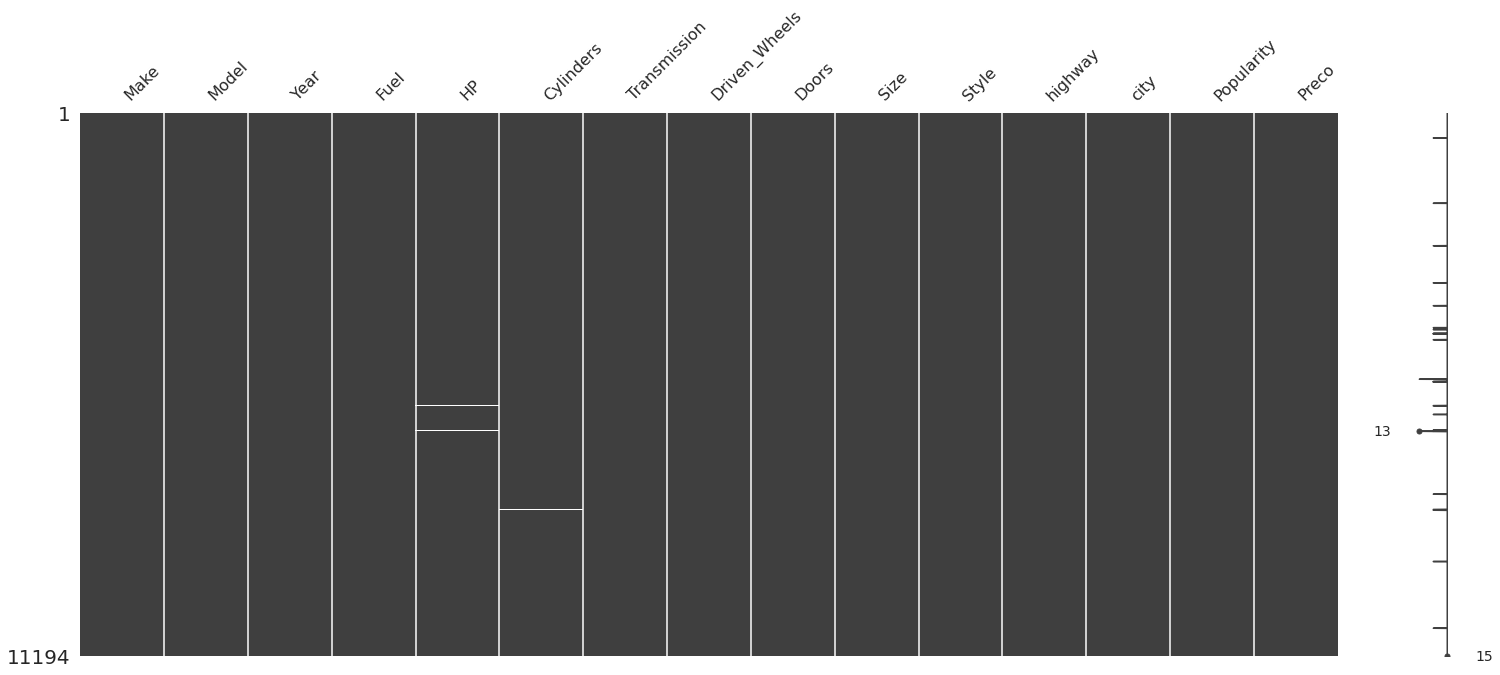

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df = df.dropna()

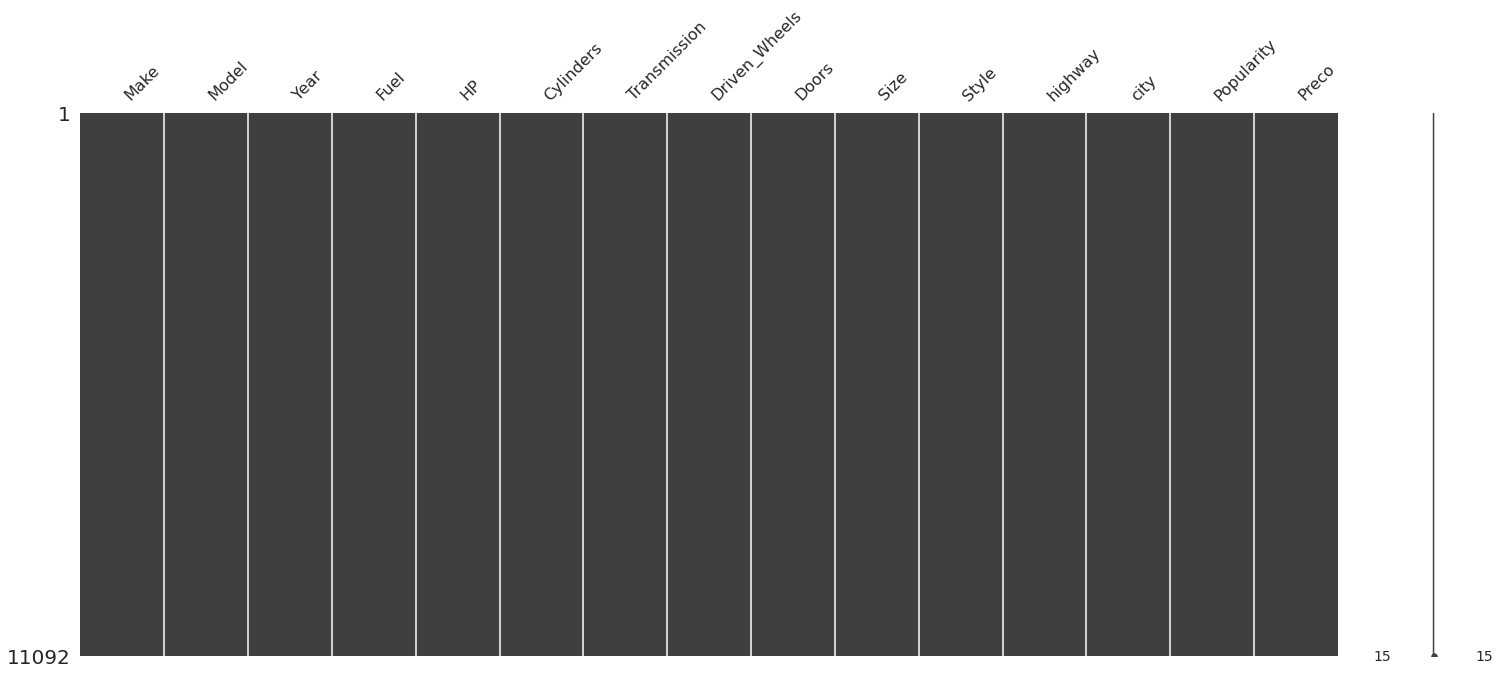

In [ ]:
msno.matrix(df)

In [ ]:
df.isna().sum()

Make             0
Model            0
Year             0
Fuel             0
HP               0
Cylinders        0
Transmission     0
Driven_Wheels    0
Doors            0
Size             0
Style            0
highway          0
city             0
Popularity       0
Preco            0
dtype: int64

In [ ]:
df.fillna(0, inplace=True)

# Statistics 

Outliers Analysis

In [1]:
sns.boxplot(x=df.Preco)

NameError: ignored

In [ ]:
df.describe()

,Year,HP,Cylinders,Doors,highway,city,Popularity,Preco
count,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,1.109200e+04
mean,2010.693833,253.528579,5.687973,3.450415,26.272899,19.300667,1556.681302,4.190853e+04
std,7.241249,110.184621,1.766331,0.874700,7.481404,6.605683,1443.586149,6.174305e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.153750e+04
50%,2015.000000,240.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.059750e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.302250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
df[df.HP<240].count()

Make             5538
Model            5538
Year             5538
Fuel             5538
HP               5538
Cylinders        5538
Transmission     5538
Driven_Wheels    5538
Doors            5538
Size             5538
Style            5538
highway          5538
city             5538
Popularity       5538
Preco            5538
dtype: int64

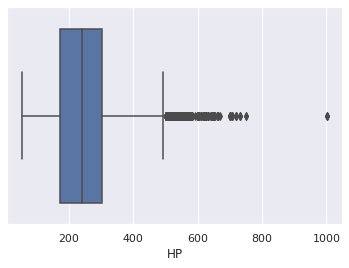

In [ ]:
sns.boxplot(x=df.HP)

In [ ]:
df.describe()

,Year,HP,Cylinders,Doors,highway,city,Popularity,Preco
count,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,1.109200e+04
mean,2010.693833,253.528579,5.687973,3.450415,26.272899,19.300667,1556.681302,4.190853e+04
std,7.241249,110.184621,1.766331,0.874700,7.481404,6.605683,1443.586149,6.174305e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.153750e+04
50%,2015.000000,240.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.059750e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.302250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
print(q1,q3)

Year           2007.0
HP              172.0
Cylinders         4.0
Doors             2.0
highway          22.0
city             16.0
Popularity      549.0
Preco         21537.5
Name: 0.25, dtype: float64 Year           2016.0
HP              303.0
Cylinders         6.0
Doors             4.0
highway          30.0
city             22.0
Popularity     2009.0
Preco         43022.5
Name: 0.75, dtype: float64


In [ ]:
df[df.HP<172.0].count()

Make             2764
Model            2764
Year             2764
Fuel             2764
HP               2764
Cylinders        2764
Transmission     2764
Driven_Wheels    2764
Doors            2764
Size             2764
Style            2764
highway          2764
city             2764
Popularity       2764
Preco            2764
dtype: int64

In [ ]:
df[df.HP<303.0].count()+2764

Make             11047
Model            11047
Year             11047
Fuel             11047
HP               11047
Cylinders        11047
Transmission     11047
Driven_Wheels    11047
Doors            11047
Size             11047
Style            11047
highway          11047
city             11047
Popularity       11047
Preco            11047
dtype: int64

In [ ]:
IQR = q3-q1

df = df[~((df<( q1 - 1.5*IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1) ]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  This is separate from the ipykernel package so we can avoid doing imports until


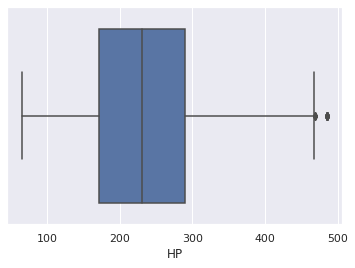

In [ ]:
sns.boxplot(x=df.HP)

In [ ]:
df.describe()

,Year,HP,Cylinders,Doors,highway,city,Popularity,Preco
count,8609.000000,8609.000000,8609.000000,8609.000000,8609.000000,8609.000000,8609.000000,8609.000000
mean,2011.299919,235.662098,5.392612,3.541062,26.673365,19.427227,1210.180160,30992.557556
std,6.303927,77.711522,1.388723,0.826331,5.680417,4.350585,864.203659,15160.555730
min,1994.000000,66.000000,3.000000,2.000000,13.000000,10.000000,21.000000,2000.000000
25%,2008.000000,172.000000,4.000000,4.000000,23.000000,16.000000,549.000000,21935.000000
50%,2015.000000,230.000000,6.000000,4.000000,26.000000,19.000000,1013.000000,29970.000000
75%,2016.000000,290.000000,6.000000,4.000000,31.000000,22.000000,1851.000000,39995.000000
max,2017.000000,485.000000,8.000000,4.000000,42.000000,31.000000,3916.000000,75200.000000


In [ ]:
df.Make.value_counts()

Chevrolet        1028
Toyota            629
Volkswagen        515
Nissan            513
GMC               469
Dodge             425
Mazda             378
Honda             373
Suzuki            336
Infiniti          322
Cadillac          300
Hyundai           242
Audi              240
Volvo             236
Acura             232
Subaru            220
BMW               218
Kia               216
Buick             184
Mitsubishi        179
Chrysler          173
Mercedes-Benz     170
Lexus             163
Pontiac           157
Lincoln           142
Saab              109
Oldsmobile        105
Land Rover         91
FIAT               59
Scion              55
Plymouth           43
Porsche            38
Lotus              20
HUMMER             17
Alfa Romeo          5
Maserati            4
Genesis             3
Name: Make, dtype: int64

In [ ]:
df.Make.unique()

array(['BMW', 'Audi', 'FIAT', 'Chrysler', 'Nissan', 'Mazda', 'Mitsubishi',
       'Alfa Romeo', 'Toyota', 'Porsche', 'Volvo', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Kia',
       'Chevrolet', 'Cadillac', 'Dodge', 'Lincoln', 'Pontiac', 'Subaru',
       'Volkswagen', 'Mercedes-Benz', 'Buick', 'Acura', 'Land Rover',
       'Lotus', 'Lexus', 'Infiniti', 'Scion', 'Genesis', 'Maserati',
       'HUMMER'], dtype=object)

In [ ]:
df.nunique()

Make               37
Model             646
Year               24
Fuel                8
HP                243
Cylinders           5
Transmission        4
Driven_Wheels       4
Doors               3
Size                3
Style              16
highway            30
city               22
Popularity         37
Preco            4772
dtype: int64

Text(0, 0.5, 'Qte Carros')

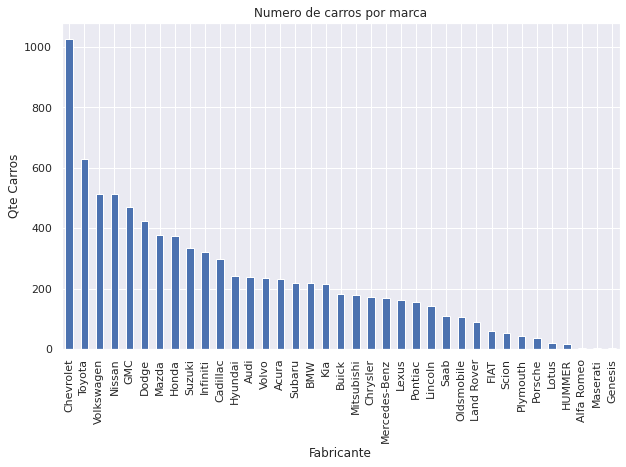

In [ ]:
df.Make.value_counts().nlargest(37).plot(kind='bar', figsize=(10,6))
plt.title('Numero de carros por marca')
plt.xlabel('Fabricante')
plt.ylabel('Qte Carros')

Text(0, 0.5, 'Qte Carros')

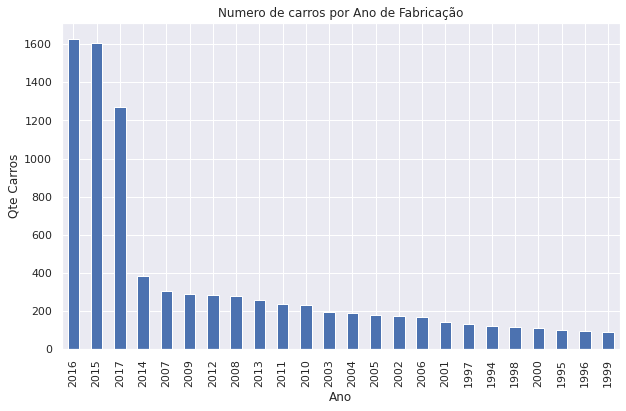

In [ ]:
df.Year.value_counts().plot(kind='bar', figsize=(10,6))
plt.title('Numero de carros por Ano de Fabricação')
plt.xlabel('Ano')
plt.ylabel('Qte Carros')

Text(0, 0.5, 'Qte Carros')

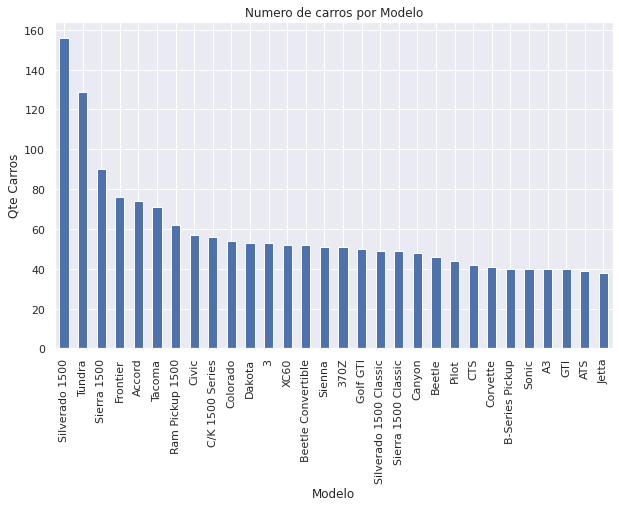

In [ ]:
df.Model.value_counts().nlargest(30).plot(kind='bar', figsize=(10,6))
plt.title('Numero de carros por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Qte Carros')

Text(0, 0.5, 'Qte Carros')

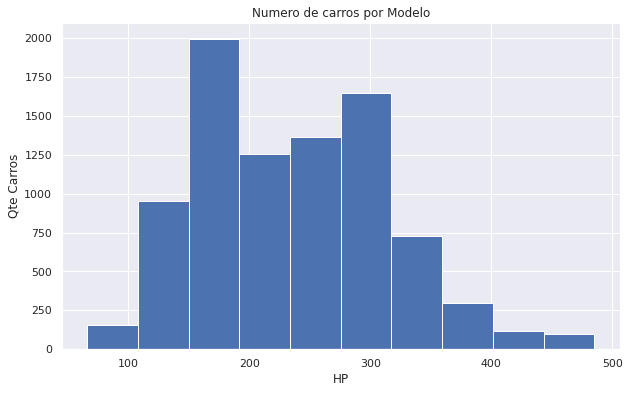

In [ ]:
df.HP.plot(kind='hist', figsize=(10,6))
plt.title('Numero de carros por Modelo')
plt.xlabel('HP')
plt.ylabel('Qte Carros')

In [ ]:
df[df.Model == '3'].Make.unique()

array(['Mazda'], dtype=object)

In [ ]:
df[df.Make == 'Mazda'].Model.unique()

array(['2', '323', '3', '5', '626', '6', '929', 'B-Series Pickup',
       'B-Series Truck', 'B-Series', 'CX-3', 'CX-5', 'CX-7', 'CX-9',
       'Mazdaspeed 3', 'Mazdaspeed 6', 'Mazdaspeed MX-5 Miata',
       'Mazdaspeed Protege', 'Millenia', 'MPV', 'MX-3', 'MX-5 Miata',
       'MX-6', 'Navajo', 'Protege5', 'Protege', 'Tribute Hybrid',
       'Tribute', 'Truck'], dtype=object)

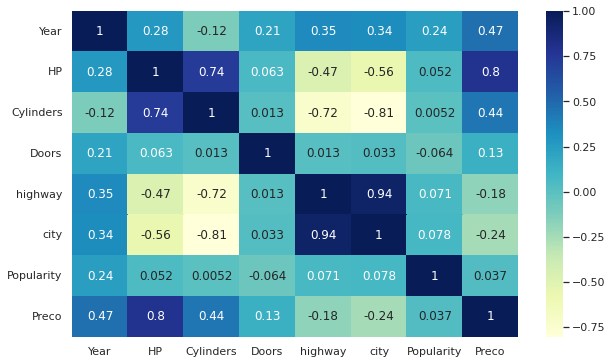

In [ ]:
plt.figure(figsize=(10,6))
Co = df.corr(method='spearman')
sns.heatmap(Co,cmap='YlGnBu', annot=True)

In [ ]:
Co

,Year,HP,Cylinders,Doors,highway,city,Popularity,Preco
Year,1.000000,0.278474,-0.118196,0.207820,0.354026,0.339431,0.244955,0.465616
HP,0.278474,1.000000,0.737849,0.062962,-0.469402,-0.564292,0.051644,0.795389
Cylinders,-0.118196,0.737849,1.000000,0.013067,-0.724200,-0.805561,0.005211,0.438674
Doors,0.207820,0.062962,0.013067,1.000000,0.013096,0.033198,-0.064499,0.133202
highway,0.354026,-0.469402,-0.724200,0.013096,1.000000,0.939427,0.070863,-0.176386
city,0.339431,-0.564292,-0.805561,0.033198,0.939427,1.000000,0.077571,-0.244187
Popularity,0.244955,0.051644,0.005211,-0.064499,0.070863,0.077571,1.000000,0.036827
Preco,0.465616,0.795389,0.438674,0.133202,-0.176386,-0.244187,0.036827,1.000000


In [ ]:
df.Year.nunique()

24

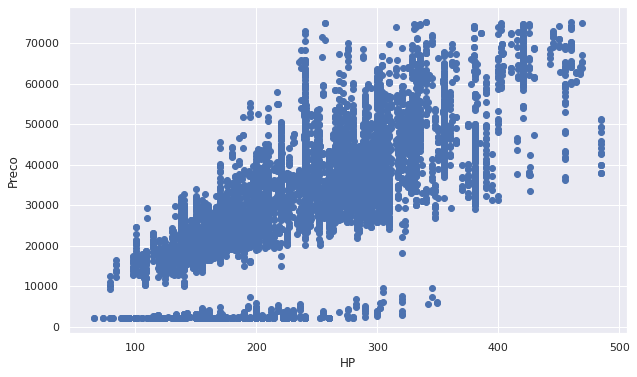

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df.HP,df.Preco)
ax.set_xlabel('HP')
ax.set_ylabel('Preco')
plt.show()

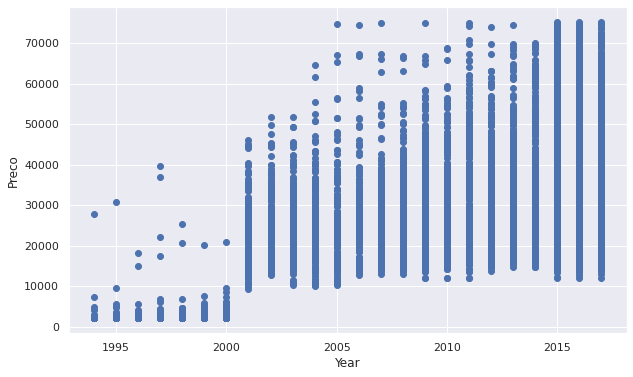

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df.Year,df.Preco)
ax.set_xlabel('Year')
ax.set_ylabel('Preco')
plt.show()

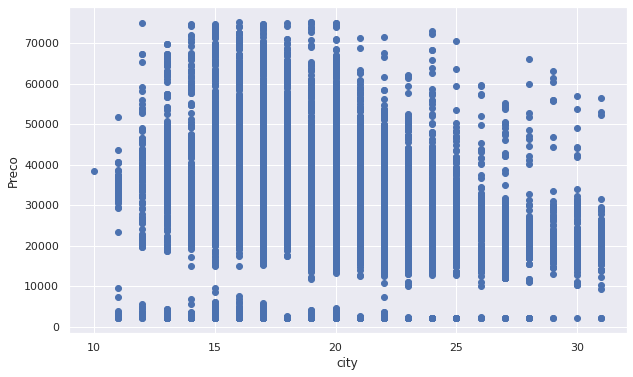

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df.city,df.Preco)
ax.set_xlabel('city')
ax.set_ylabel('Preco')
plt.show()

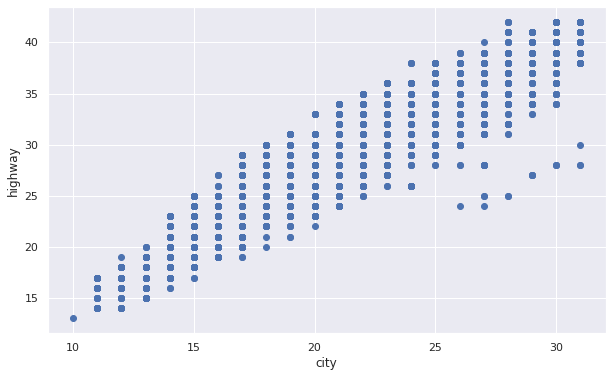

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df.city,df.highway)
ax.set_xlabel('city')
ax.set_ylabel('highway')
plt.show()

In [ ]:
import plotly.express as px

df.sort_values(by='HP',inplace=True, ignore_index=True)


fig = px.histogram(df, x='HP', y = 'Preco', color = 'Doors')
fig.show()

fig = px.histogram(df, x='HP', y = 'Preco')
fig.show()

In [ ]:
import plotly.figure_factory as ff

hist_data = [df.HP.values]
labels = [df.Doors.astype('str').values]

fig = ff.create_distplot(hist_data, labels, bin_size= 4)
fig.show()

In [ ]:
labels

[array(['2.0', '2.0', '4.0', ..., '2.0', '2.0', '2.0'], dtype=object)]

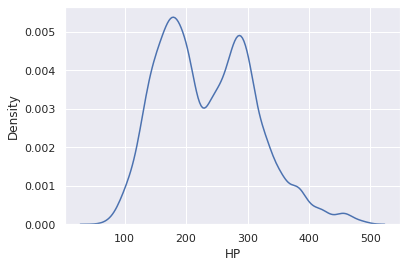

In [ ]:
import seaborn as sns

sns.kdeplot(data=df, x='HP')

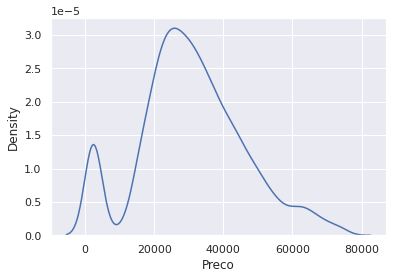

In [ ]:
import seaborn as sns

sns.kdeplot(data=df, x='Preco')

In [ ]:
df['y'] = 0

In [ ]:
df.at[df.Preco > 30000 ,  'y' ] = 1

In [ ]:
df.y.value_counts()

0    4339
1    4270
Name: y, dtype: int64

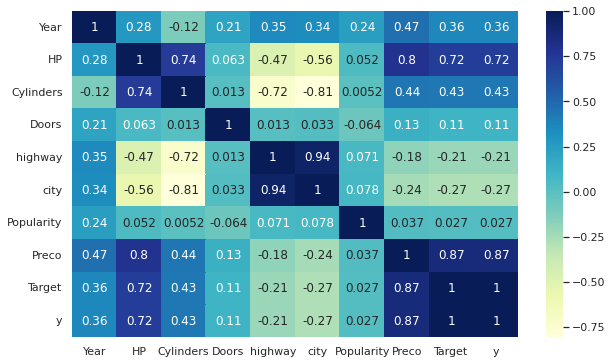

In [ ]:
plt.figure(figsize=(10,6))
Co = df.corr(method='spearman')
sns.heatmap(Co,cmap='YlGnBu', annot=True)

In [ ]:
y = df.y.values
X = df[['HP','Year','Cylinders','Doors','city','highway']].values

In [ ]:
df[df.y  == 1].Preco.min()

30005

In [ ]:
df[df.y  == 0].Preco.max()

30000

In [ ]:
len(X)

8609

In [ ]:
X[1]

array([  66., 1994.,    4.,    2.])

# Slpitting train & test


In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [ ]:
len(X_train)

6887

In [ ]:
len(X_test)

1722

In [ ]:
len(y_train)

6887

# Train XGBoost

In [ ]:
from xgboost import XGBClassifier

classifier = XGBClassifier()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

ac = accuracy_score(y_test,y_pred)

cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot = True, cmap = 'Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

print("ACCURACY ==>",ac)

XGBClassifier()

# Predicting the Test 


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred[0]

1

In [ ]:
X_test[0]

array([ 485., 2016.,    8.,    4.,   15.])

In [ ]:
y_test[0]

1

# Confusion Matrix

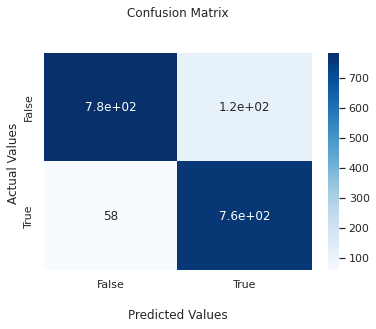

ACCURACY ==> 0.8989547038327527


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

ac = accuracy_score(y_test,y_pred)

cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot = True, cmap = 'Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

print("ACCURACY ==>",ac)